# CM50270 Reinforcement Learning
## Graded Assessment: Racetrack

In this assignment, you will compare the performance of three reinforcement learning algorithms - *On-Policy First-Visit Monte-Carlo Control*, *Sarsa*, and *Q-Learning* - in a simple racetrack environment. You will then implement a modified TD agent that improves upon the learning performance of a basic Q-Learning agent.

**Total number of marks:** 30 Marks

**Contribution to Unit Grade:** 30%

**What to submit:** Your completed Jupyter notebook (.ipynb file) which should include **all** of your source code. Please **do not change the file name or compress/zip your submission**.

**Where to submit:** CM50270 Moodle Page.

This coursework will be marked **anonymously**. Please do not include any identifying information on the files you submit.

You are required to **work individually** on this coursework. You are welcome to discuss ideas with others but you must design your own implementation and **write your own code and answers**. If you do include any any third-party code or text in your submission, please **reference it appropriately**.

**Do not plagiarise**. Plagiarism is a serious academic offence. Both your code and written answers will be automatically checked for possible instances of plagiarism. For details on what plagiarism is and how to avoid it, please visit the following webpage: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

If you are asked to use specific variable names, data-types, function signatures and notebook cells, please **ensure that you follow these instructions**. Not doing so will cause the our marking software to reject your work, and will assign you a score of zero for that exercise. Please **do not delete or duplicate existing cells**: if you need additional cells, please insert new ones. **If our marking software rejects your work because you have not followed our instructions, you may not get any credit for your work**.

For this coursework, you may use the [Python standard library](https://docs.python.org/3/library/), numpy, and matplotlib. You should also use the `racetrack_env.py` file, which we have provided for you. Please **do not use any other non-standard, third-party libraries**. **If we are unable to run your code because you have used unsupported external libraries, you may not get any credit for your work.**

Please **ensure that your code is readable**. If we cannot tell what your code is doing when marking, you may not get full credit for your work.

Please remember to **save and backup your work regularly**.

Please be sure to **restart the kernel and run your code from start-to-finish** (Kernel → Restart & Run All) before submitting your notebook. Otherwise, you may not be aware that you are using variables in memory that you have deleted.

**Your total runtime must be less than 10 minutes** on the University's lab computers. If your submission exceeds this, it will be automatically interrupted, and you may not get full credit for your work.

Please **adhere to written answer length limits**. When marking, we will not read beyond the specified maximum word counts, and you may not get any credit for anything written beyond them.

## The Racetrack Environment
We have implemented a custom environment called "Racetrack" for you to use during this piece of coursework. It is inspired by the environment described in the course textbook (Reinforcement Learning, Sutton & Barto, 2018, Exercise 5.12), but is not exactly the same.

### Environment Description
Consider driving a race car around a turn on a racetrack. In order to complete the race as quickly as possible, you would want to drive as fast as you can but, to avoid running off the track, you must slow down while turning.

In our simplified racetrack environment, the agent is at one of a discrete set of grid positions. The agent also has a discrete speed in two directions, $x$ and $y$. So the state is represented as follows:
$$(\text{position}_y, \text{position}_x, \text{velocity}_y, \text{velocity}_x)$$

The agent collects a reward of -1 at each time step, an additional -10 for leaving the track (i.e., ending up on a black grid square in the figure below), and an additional +10 for reaching the finish line (any of the red grid squares). The agent starts each episode on a randomly selected grid-square on the starting line (green grid squares) with a speed of zero in both directions. At each time step, the agent can change its speed in both directions. Each speed can be changed by +1, -1 or 0, giving a total of nine actions. For example, the agent may increase its speed in the $x$ direction by -1 and its speed in the $y$ direction by +1. The agent's speed cannot be greater than +10 or less than -10 in either direction.

<img src="images/track_big.png" style="width: 600px;"/>


The agent's next state is determined by its current grid square, its current speed in two directions, and the changes it  makes to its speed in the two directions. This environment is stochastic. When the agent tries to change its speed, no change occurs (in either direction) with probability 0.2. In other words, 20% of the time, the agent's action is ignored and the car's speed remains the same in both directions.

If the agent leaves the track, it is returned to a random start grid-square and has its speed set to zero in both directions; the episode continues. An episode ends only when the agent transitions to a goal grid-square.



### Environment Implementation
We have implemented the above environment in the `racetrack_env.py` file, for you to use in this coursework. Please use this implementation instead of writing your own, and please do not modify the environment.

We provide a `RacetrackEnv` class for your agents to interact with. The class has the following methods:
- **`reset()`** - this method initialises the environment, chooses a random starting state, and returns it. This method should be called before the start of every episode.
- **`step(action)`** - this method takes an integer action (more on this later), and executes one time-step in the environment. It returns a tuple containing the next state, the reward collected, and whether the next state is a terminal state.
- **`render(sleep_time)`** - this method renders a matplotlib graph representing the environment. It takes an optional float parameter giving the number of seconds to display each time-step. This method is useful for testing and debugging, but should not be used during training since it is *very* slow. **Do not use this method in your final submission**.
- **`get_actions()`** - a simple method that returns the available actions in the current state. Always returns a list containing integers in the range [0-8] (more on this later).

In our code, states are represented as Python tuples - specifically a tuple of four integers. For example, if the agent is in a grid square with coordinates ($Y = 2$, $X = 3$), and is moving zero cells vertically and one cell horizontally per time-step, the state is represented as `(2, 3, 0, 1)`. Tuples of this kind will be returned by the `reset()` and `step(action)` methods. It is worth noting that tuples can be used to index certain Python data-structures, such as dictionaries.

There are nine actions available to the agent in each state, as described above. However, to simplify your code, we have represented each of the nine actions as an integer in the range [0-8]. The table below shows the index of each action, along with the corresponding changes it will cause to the agent's speed in each direction.

<img src="images/action_grid.png" style="width: 250px;"/>

For example, taking action 8 will increase the agent's speed in the $x$ direction, but decrease its speed in the $y$ direction.

### Racetrack Code Example
Below, we go through a quick example of using the `RaceTrackEnv` class.

First, we import the class, then create a `RaceTrackEnv` object called `env`. We then initialise the environment using the `reset()` method, and take a look at the initial state variable and the result of `plot()`.


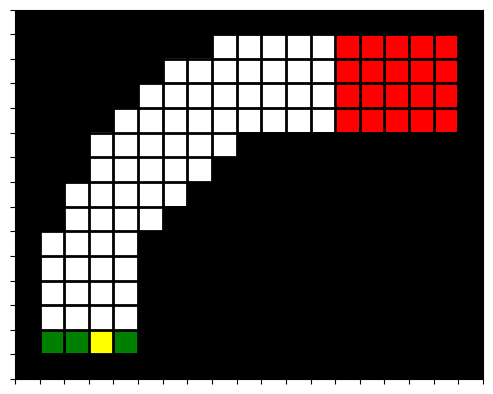

Initial State: (1, 3, 0, 0)


In [1]:
%matplotlib inline

# Set random seed to make example reproducable.
import numpy as np
import random
seed = 5
random.seed(seed)
np.random.seed(seed)

from racetrack_env import RacetrackEnv

# Instantiate environment object.
env = RacetrackEnv()

# Initialise/reset environment.
state = env.reset()
env.render()
print("Initial State: {}".format(state))

As you can see, `reset()` has returned a valid initial state as a four-tuple. The function `plot()` uses the same colour-scheme as described above, but also includes a yellow grid-square to indicate the current position of the agent.

Let's make the agent go upward by using `step(1)`, then inspect the result (recall that action `1` increments the agent's vertical speed while leaving the agent's horizontal speed unchanged).

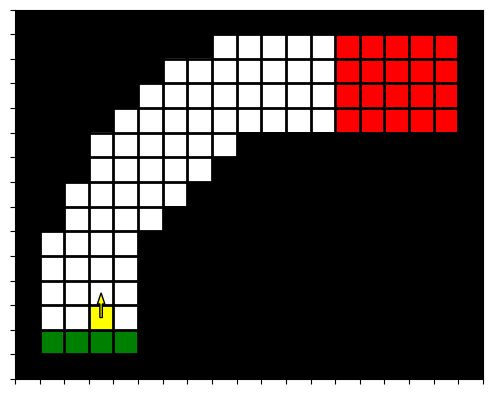

Next State: (2, 3, 1, 0), Reward: -1, Terminal: False


In [2]:
# Let us increase the agent's vertical speed (action 1).
next_state, reward, terminal = env.step(1)
env.render()
print("Next State: {}, Reward: {}, Terminal: {}".format(next_state, reward, terminal))

You can see that the agent has moved one square upwards, and now has a positive vertical speed (indicated by the yellow arrow). Let's set up a loop to see what happens if we take the action a few more times, causing it to repeatedly leave the track.

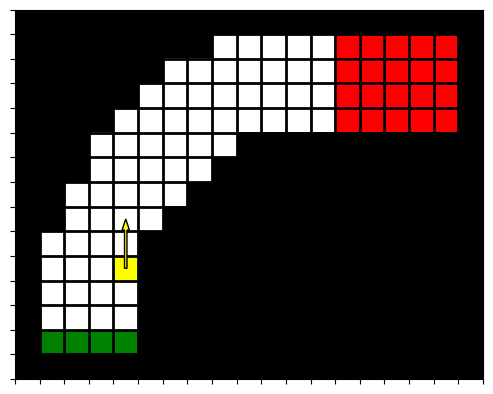

In [3]:
num_steps = 50
for t in range(num_steps) :
    next_state, reward, terminal = env.step(1)
    env.render()

## Exercise 1: Comparing Fundamental RL Algorithms (12 Marks)

Below, we have plotted learning curves showing the performance of On-Policy Monte Carlo Control, Sarsa, and Q-Learning in the Racetrack environment.
We have included an unaltered version of the learning curve, as well as a cropped version to make it easier to compare agents' performance towards the end of training.

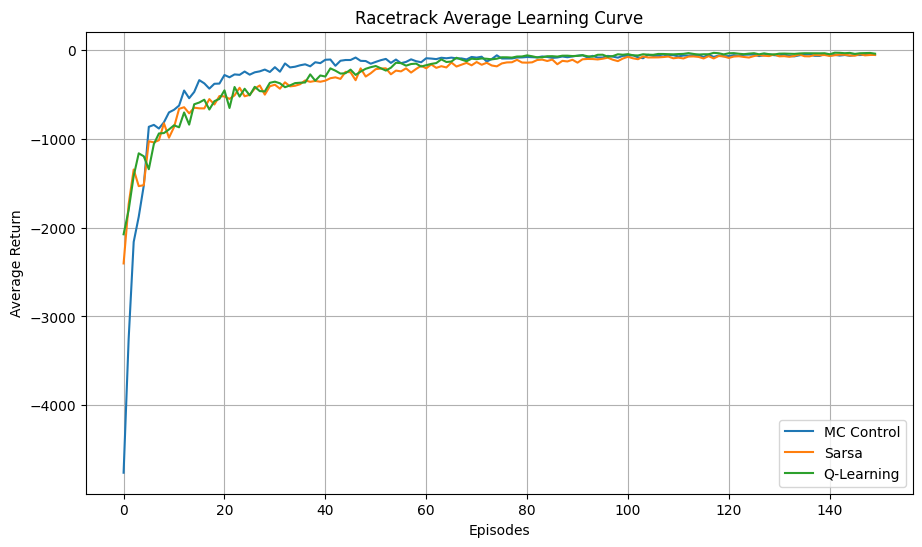

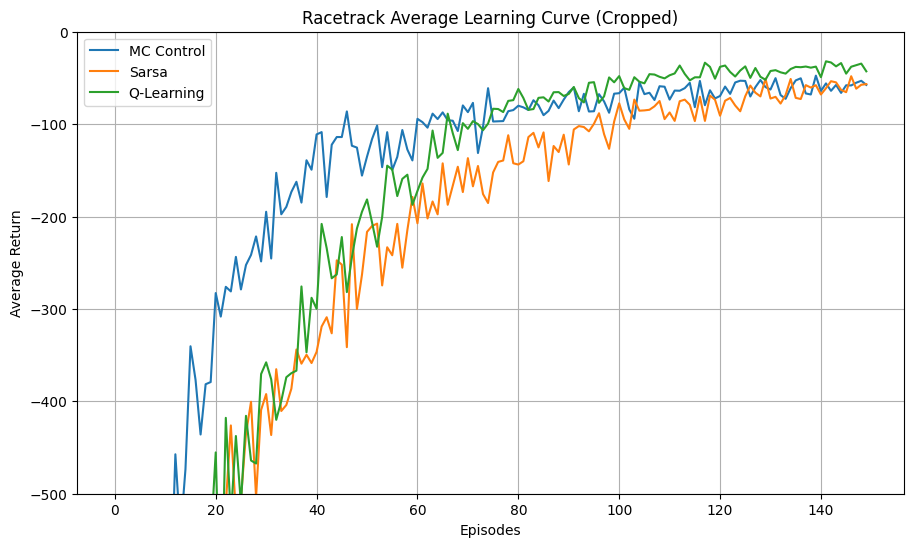

In [4]:
from racetrack_env import plot_combined_results

# Plotting Combined Learning Curve.
%matplotlib inline
plot_combined_results()

Based on these results, and your understanding of the three algorithms used to produce them, please answer the following discussion questions. <br />

**Question 1:** Briefly compare the performance of each of the three agents.

**Question 2:** Why do you think that your Monte Carlo and Temporal-Difference agents behaved differently?

**Question 3:** Does the performance of your Sarsa and Q-Learning agents meet your expectations? Why do you think that this is the case?

**Question 4:** What could be done to improve the performance of these agents?

Please do not exceed **60 words** for any of your answers.

Please write your answers for Exercise 1 in this markdown cell.

**Answer 1:**
Q-Learning and Sarsa use epsilon-greedy exploration, differing in on/off-policy learning. Q-Learning's off-policy approach explores more actions for faster learning, while Sarsa's on-policy strategy prioritizes stability. On-Policy Monte Carlo Control has higher initial returns due to its riskier exploration, affecting learning curves in complex environments. This is also because of the updation of value function for each algorithm

**Answer 2:**
MC and TD agents differ in update timing and sample efficiency. MC updates values after episodes, leading to delayed learning and higher variance. TD learns incrementally at each step, utilizing samples efficiently for faster adaptation. MC has early peaks but risky exploration, while TD shows cautious learning with better final policies. The choice depends on problem context and resource constraints.

**Answer 3:**
My expectation for Sarsa and Q-Learning agents was distinct learning curves due to the same epsilon-greedy policy. However, they appeared similar due to this policy. Their Q-value update timings differed, leading to Sarsa's consistent curve and Q-Learning's volatile one, with Q-Learning converging later due to its off-policy updates.(Szepesvári, C., 2022. Algorithms for reinforcement learning. Springer nature.) (https://lilianweng.github.io/posts/2018-02-19-rl-overview/)

**Answer 4:**

An easy way to improve Q-Learning, Sarsa, and Monte Carlo algorithms is through hyperparameter tuning using grid, random, or Bayesian search. For more significant performance enhancements, incorporating agents with n-step or λ-step methods, eligibility trace or employing advanced algorithms like Double Q-Learning deep q networks can be highly effective.

## Exercise 2: Modified Temporal-Difference Learning Agent (18 Marks)
### Exercise 2a: Implementation
In this exercise, you must implement a Temporal-Difference learning agent that learns to reach a goal state in the racetrack more efficiently than the Q-Learning agent shown above. You may base your implementation on Q-Learning (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131), the pseudocode for which is reproduced below, but you may also base your implementation on Sarsa if you wish.

<img src="images/q_learning_algo.png" style="width: 650px;"/>

In order to score high marks in this exercise, you will need to extend your solution beyond a simple Q-Learning or Sarsa agent to achieve a higher return and/or to learn more efficiently (i.e. using fewer interactions with the environment). Ideas for improving your agent will have been discussed in lectures, and more can be found in the unit textbook (Reinforcement Learning, Sutton & Barto, 2018). However you go about improving your agent, it must still use a **tabular** Temporal-Difference learning method at its core (i.e., it should not make use of function approximation, neural networks etc.).

Please use the following parameter settings:
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 5.

**If you use incorrect parameters, you may not get any credit for your work.**

You may adjust all other parameters as you see fit.


Your implementation of a tabular modified Temporal-Difference learning agent should produce a list named `modified_agent_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `modified_agent_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.


Agent 1 Rewards: [-18313, -2736, -2492, -328, -251, -298, -691, -295, 3, -54, -31, -47, -73, -60, -201, 3, 4, 3, -16, -73, -12, -17, -28, 4, 4, -13, 3, 4, -14, 4, -108, 3, -22, 4, 2, 4, 4, 4, 4, 4, -13, -44, -13, 3, -53, 4, -14, 4, 3, 4, -15, 2, -16, -4, 4, 4, 2, -30, -15, -13, 2, -29, 3, 4, 4, -31, 4, -14, 3, 3, 4, 3, 2, 4, 4, 2, 4, 3, 4, 2, 4, 4, 2, 3, 3, -11, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 2, 2, 3, 3, 4, 2, -13, 4, -41, 3, 3, -18, 4, 4, -3, 3, 4, 4, 4, 4, 4, -14, 4, 3, 3, 4, -12, 3, 3, -2, 3, 4, 3, 4, 4, 1, 4, 2, 3, 2, 4, 3, 3, 4, 3, 4, -14, 3, 3, 3, -15, 4]
Agent 2 Rewards: [-16673, -2726, -5888, -1804, -1109, -75, 4, -10, -76, -14, -2, -81, -597, -74, -59, -59, -30, -71, -12, 4, -11, -285, 4, -12, -154, 4, -79, 3, 3, -59, 3, -14, -10, -13, 4, -32, -10, -172, -14, -19, -36, -32, 4, 3, 4, 3, -29, -14, -16, -47, 3, -15, -17, 3, 1, 4, -48, 3, 3, -14, 3, -31, -14, -28, -15, 3, 1, -15, -44, 4, 2, -32, 1, 4, 3, -12, -11, 4, 3, -13, -18, 3, 3, -18, 3, 4, 2, -72, -33, 3, 4, 4, 3, 1, 2

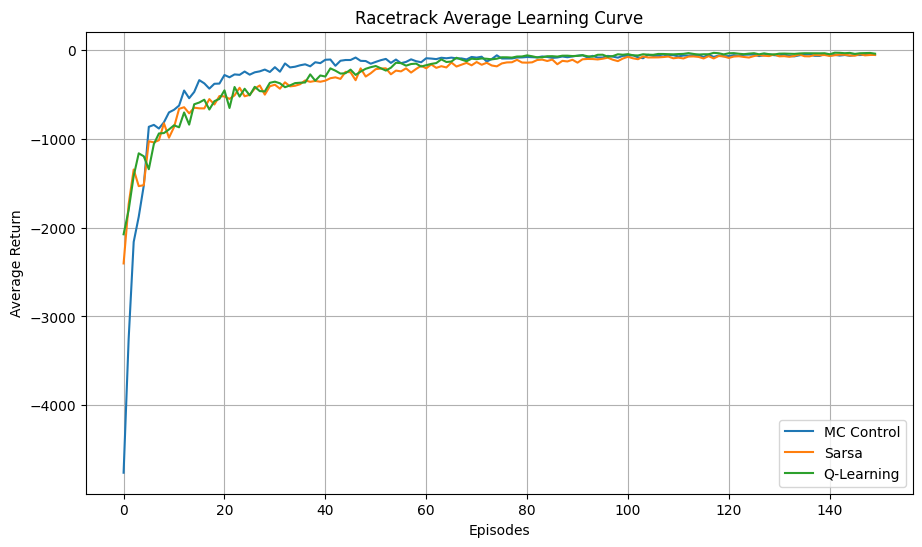

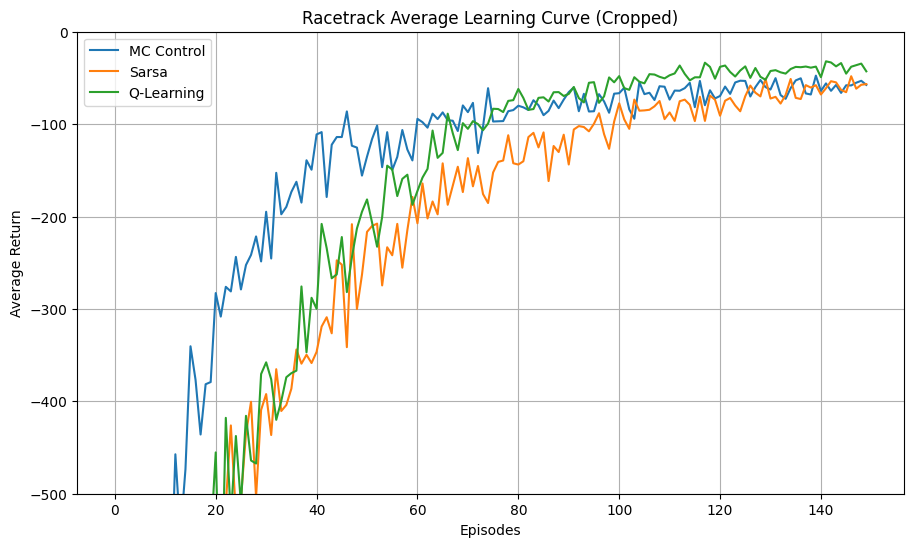

In [5]:
class ModifiedTDExperinceRelay:
    def __init__(self, state_space_size, action_space_size, alpha=0.1, gamma=0.9, epsilon=0.01, epsilon_decay_value=0.999, replay_buffer_size=10000, batch_size=32):
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = epsilon  # exploration-exploitation trade-off
        self.epsilon_decay_value = epsilon_decay_value  # decay rate for epsilon (exploration)
        self.replay_buffer_size = replay_buffer_size  # size of the replay buffer
        self.batch_size = batch_size  # size of the mini-batch for training
        self.replay_buffer = []  # replay buffer to store experiences
        self.replay_buffer_index = 0  # index to keep track of the current position in the replay buffer
        self.q_values = np.zeros((state_space_size[0], state_space_size[1], state_space_size[2], state_space_size[3], action_space_size))
        self.model = {}  # model of the environment to store observed transitions
    def replay_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(len(self.q_values[state]))
        else:
            return np.argmax(self.q_values[state])
    def replay_values(self, state, action, reward, next_state, done):
        experience = (state, action, reward, next_state, done)
        if len(self.replay_buffer) < self.replay_buffer_size:
            self.replay_buffer.append(experience)
        else:
            self.replay_buffer[self.replay_buffer_index % self.replay_buffer_size] = experience
            self.replay_buffer_index += 1
        if len(self.replay_buffer) < self.batch_size:
            return
        mini_batch = random.sample(self.replay_buffer, self.batch_size)
        for state, action, reward, next_state, done in mini_batch:
            current_q_value = self.q_values[state][action]
            max_next_q_value = np.max(self.q_values[next_state]) if not done else 0  # if terminal state, max_next_q_value = 0
            target = reward + self.gamma * max_next_q_value
            self.q_values[state][action] += self.alpha * (target - current_q_value)
            # Update the model
            if state in self.model:
                self.model[state][action] = (reward, next_state, done)
            else:
                self.model[state] = {action: (reward, next_state, done)}
        self.epsilon *= self.epsilon_decay_value
    def value_ploting(self, num_planning_steps):
        for _ in range(num_planning_steps):
            state = random.choice(list(self.model.keys()))
            action = random.choice(list(self.model[state].keys()))
            reward, next_state, done = self.model[state][action]
            current_q_value = self.q_values[state][action]
            max_next_q_value = np.max(self.q_values[next_state]) if not done else 0  # if terminal state, max_next_q_value = 0
            target = reward + self.gamma * max_next_q_value
            self.q_values[state][action] += self.alpha * (target - current_q_value)
    def experience_replay_episodes(self, environment, num_episodes):
        agent_rewards = []
        for episode in range(num_episodes):
            state = environment.reset()
            total_reward = 0
            is_terminal_value = True
            while is_terminal_value:
                action = self.replay_action(state)
                next_state, reward, is_terminal = environment.step(action)
                self.replay_values(state, action, reward, next_state, is_terminal)
                state = next_state
                total_reward += reward
                is_terminal_value = not is_terminal
            agent_rewards.append(total_reward)
            self.value_ploting(num_planning_steps=5)  # Perform planning after each episode
        return agent_rewards
if __name__ == "__main__":
    environment = RacetrackEnv()
    state_size = (environment.track.shape[0], environment.track.shape[1], 11, 11)
    action_size = len(environment.get_actions())
    number_agents = 10
    number_episodes_per_agent = 150
    modified_agent_rewards = []
    for _ in range(number_agents):
        agent = ModifiedTDExperinceRelay(state_size, action_size, alpha=0.2, gamma=0.9, epsilon=0.1, epsilon_decay_value=0.8)
        agent_rewards = agent.experience_replay_episodes(environment, number_episodes_per_agent)
        modified_agent_rewards.append(agent_rewards)
    # Print the rewards for each agent
    for i, rewards in enumerate(modified_agent_rewards):
        print(f"Agent {i + 1} Rewards: {rewards}")
    # Plot the average learning curve
    plot_combined_results()


### Exercise 2b: Comparison & Discussion

Below, we have used your results to plot the performance of your modified agent and a Q-Learning agent on the same set of axes. <br />
A cropped version of this learning curve has also been plotted, to make it easier to compare the performance of your agents towards the end of training. <br />
If you wish, you may plot additional graphs below these learning curves to support the points you make in your discussion.

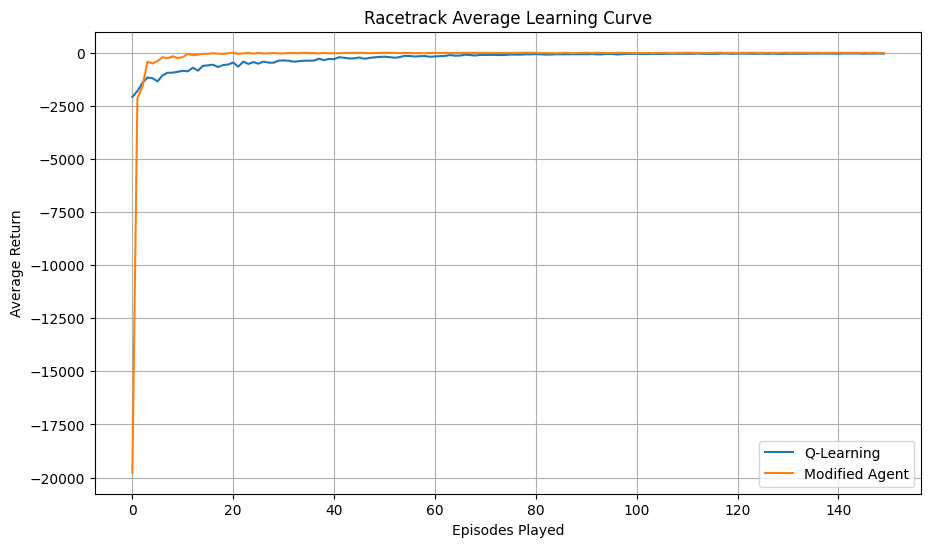

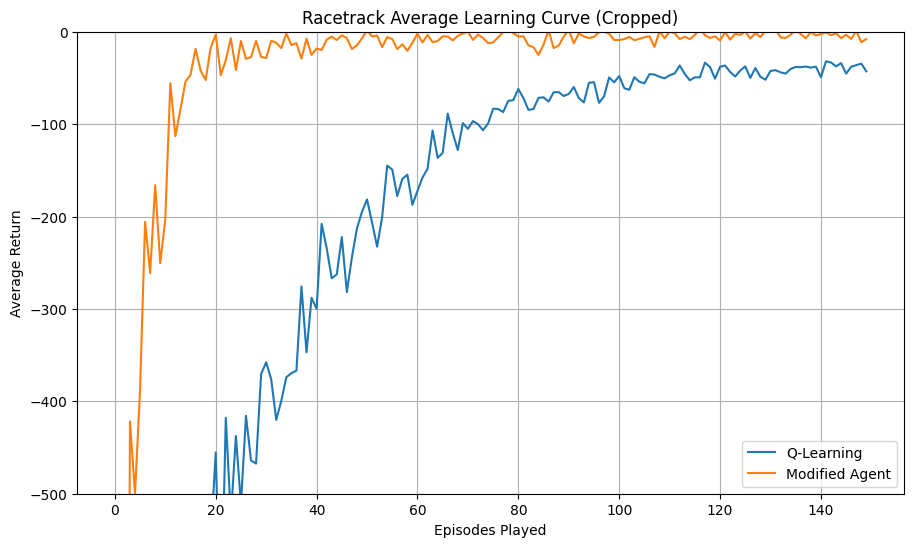

In [8]:
from racetrack_env import plot_modified_agent_results
from racetrack_env import simple_issue_checking

# Checking Modified Agent Results for Obvious Issues.
simple_issue_checking(modified_agent_rewards, modified_agent = True)

# Plotting Modified Agent Learning Curve.
%matplotlib inline
plot_modified_agent_results(modified_agent_rewards)

Based on your results, and your understanding of the algorithm and modifications that you have implemented, please answer the following discussion questions. <br />

**Question 1:** What modifications did you make to your agent?

**Question 2:** What effect(s) did you expect your modifications to have on the performance of your agent?

**Question 3:** Did your modifications have the effect(s) you expected? Why do you think that this was the case?

**Question 4:** If you had more time, what would you do to further improve the performance of your agent?

Please do not exceed **60 words** for any of your answers.

Please note that **your implementation and discussion will be assessed jointly**. This means that, in order to score highly, you will need to correctly implement appropriate modifications to your agent **AND** discuss them well.

Please write your answers for Exercise 2b in this markdown cell.

**Answer 1:**
This agent uses  Experience Replay, Model-Based Learning, and Planning Steps to learn better and make smarter decisions. The agent uses an epsilon-greedy strategy for choosing actions as it is optimal and keeps a replay buffer and model of the environment. By fine-tuning its settings like in Dyna-Q, it becomes efficient for tasks needing sequential decisions.

**Answer 2:**
These changes aim to improve agent performance by improving the balance between exploration and exploitation through an Epsilon-intensive strategy, stabilizing the learning process by repeating testing and Integrated planning through model updates. These changes will lead to more efficient learning, better decision-making, and better convergence toward optimal policies, ultimately leading to higher cumulative rewards in the environment.

**Answer 3:**

I incorporated Dyna-Q alongside epsilon-greedy action selection, experience replay, and planning with observed transitions in ModifiedTDExperinceRelay. I experimented with other methods like n-step and lambda-step, finding this combination most effective, leading to faster code execution. These changes met my expectations, optimizing the agent's performance within the environment while reducing computational time.


**Answer 4:**
If there is more time I would consider implementing Priority Experience Replay (PER) to replay more informative experiences, Dual Q-Learning to minimize overestimation bias, and dual network architecture to separate status and benefit values of actions. These strategies can improve learning efficiency, reduce bias, and improve decision-making, helping to make agents more powerful and effective.

